In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [2]:
df = pd.read_csv('german_credit_data.csv')

In [3]:
print(df.head())

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB
None


In [5]:
print(df.describe())

        Unnamed: 0          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436    11.375469     0.653614    2822.736876    12.058814
min       0.000000    19.000000     0.000000     250.000000     4.000000
25%     249.750000    27.000000     2.000000    1365.500000    12.000000
50%     499.500000    33.000000     2.000000    2319.500000    18.000000
75%     749.250000    42.000000     2.000000    3972.250000    24.000000
max     999.000000    75.000000     3.000000   18424.000000    72.000000


In [6]:
print(df.isnull().sum())

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('CreditRisk')  

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

KeyError: "['CreditRisk'] not found in axis"

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
print(df.describe())

               Age          Sex          Job      Housing  Saving accounts  \
count  1000.000000  1000.000000  1000.000000  1000.000000      1000.000000   
mean     35.546000     0.690000     1.904000     1.071000         1.105000   
std      11.375469     0.462725     0.653614     0.531264         1.580023   
min      19.000000     0.000000     0.000000     0.000000         0.000000   
25%      27.000000     0.000000     2.000000     1.000000         0.000000   
50%      33.000000     1.000000     2.000000     1.000000         0.000000   
75%      42.000000     1.000000     2.000000     1.000000         2.000000   
max      75.000000     1.000000     3.000000     2.000000         4.000000   

       Checking account  Credit amount     Duration      Purpose  
count       1000.000000    1000.000000  1000.000000  1000.000000  
mean           1.577000    3271.258000    20.903000     2.878000  
std            1.257638    2822.736876    12.058814     1.978138  
min            0.000000     2

In [11]:
df['Saving accounts'].fillna('no_info', inplace=True)
df['Checking account'].fillna('no_info', inplace=True)

C:\Users\arvin\AppData\Local\Temp\ipykernel_19732\2382183704.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna('no_info', inplace=True)
C:\Users\arvin\AppData\Local\Temp\ipykernel_19732\2382183704.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [12]:
print(df.isnull().sum())

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64


In [13]:
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Standardize Numeric Features
scaler = StandardScaler()
numeric_cols = ['Age', 'Job', 'Credit amount', 'Duration']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [14]:
print(df.head())
print(df.info())

        Age  Sex       Job  Housing  Saving accounts  Checking account  \
0  2.766456    1  0.146949        1                4                 0   
1 -1.191404    0  0.146949        1                0                 1   
2  1.183312    1 -1.383771        1                0                 3   
3  0.831502    1  0.146949        0                0                 0   
4  1.535122    1  0.146949        0                0                 0   

   Credit amount  Duration  Purpose  
0      -0.745131 -1.236478        5  
1       0.949817  2.248194        5  
2      -0.416562 -0.738668        3  
3       1.634247  1.750384        4  
4       0.566664  0.256953        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   float64
 1   Sex               1000 non-null   int64  
 2   Job               1000 non-nu

In [16]:
credit_amount_Target = df['Credit amount'].median()
duration_Target = df['Duration'].median()

df['CreditRisk'] = (
    (df['Credit amount'] > credit_amount_Target) &
    (df['Duration'] < duration_Target)
).astype(int)

print(df['CreditRisk'].value_counts())

CreditRisk
0    901
1     99
Name: count, dtype: int64


In [17]:
X = df.drop('CreditRisk', axis=1)
y = df['CreditRisk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
logreg = LogisticRegression(random_state=42, solver='liblinear')  # 'liblinear' works well for small datasets

# Train the model
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.92      0.99      0.95       181
           1       0.75      0.16      0.26        19

    accuracy                           0.92       200
   macro avg       0.83      0.58      0.61       200
weighted avg       0.90      0.92      0.89       200

ROC-AUC Score: 0.9078220412910729


In [19]:
importance = best_logreg.coef_[0]

# Visualize
plt.figure(figsize=(10,8))
sns.barplot(x=importance, y=X.columns)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

NameError: name 'best_logreg' is not defined

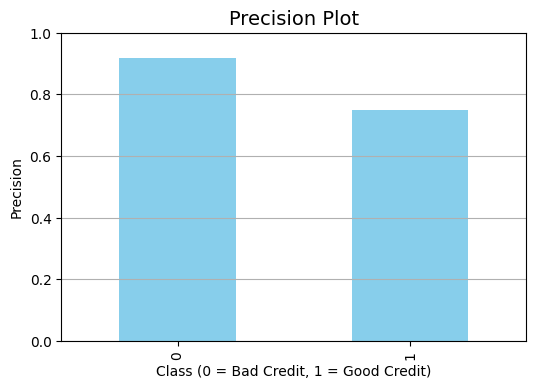

In [26]:
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()
metrics_df = metrics_df.loc[['0', '1'], ['precision', 'recall', 'f1-score']]
plt.figure(figsize=(6,4))
metrics_df['precision'].plot(kind='bar', color='skyBlue')
plt.title('Precision Plot', fontsize=14)
plt.xlabel('Class (0 = Bad Credit, 1 = Good Credit)')
plt.ylabel('Precision')
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()

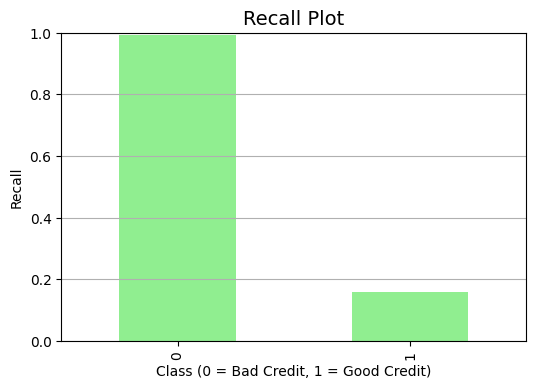

In [27]:
plt.figure(figsize=(6,4))
metrics_df['recall'].plot(kind='bar', color='lightgreen')
plt.title('Recall Plot', fontsize=14)
plt.xlabel('Class (0 = Bad Credit, 1 = Good Credit)')
plt.ylabel('Recall')
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()

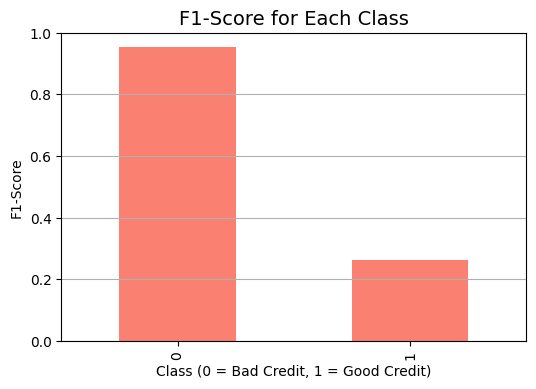

In [29]:
plt.figure(figsize=(6,4))
metrics_df['f1-score'].plot(kind='bar', color='salmon')
plt.title('F1-Score for Each Class', fontsize=14)
plt.xlabel('Class (0 = Bad Credit, 1 = Good Credit)')
plt.ylabel('F1-Score')
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()

In [32]:
pickle.dump(logreg,open('credit_card_risk.pkl','wb'))